# Part II - Ford GoBike System Data
## by Kiprop Yano

## Investigation Overview

The goal of this presentation is to provide an insight on the average trip duration among the users. Also, it will highlight the days the highest and lowest days of the week users use the bikes. 


## Dataset Overview

The dataset used in this project in the Ford GoBike System Data. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
%matplotlib inline
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of Users 

There are 160,000 susbscribed users and 20,000 customers. From the pie chart, it indicates that most users (89.2%) are subscribers more than the actual customers who comprise only 10.8%.

In [3]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# new columns from start_time
df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour

In [4]:
df['duration_minutes'] = df['duration_sec']/60

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_month                183412 non-null int64
start_weekday      

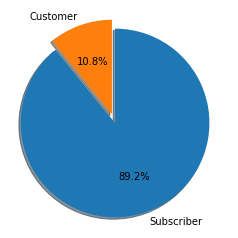

In [6]:
user_category = df['user_type'].value_counts()
plt.pie(user_category, explode =  (0, 0.1), labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.show()

### Age distribution
Most users are aged between 20 and 40 years. 

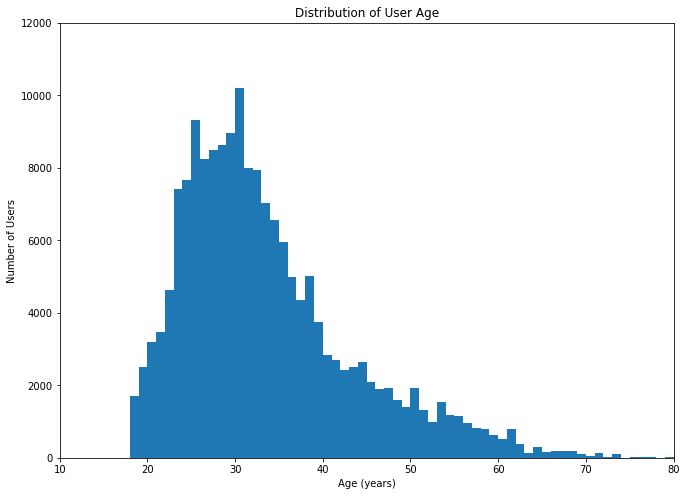

In [7]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[11, 8])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

## Average trip duration 
From the logarithmic scale plotted because of the long-tailed distribution, most of the bike trips were between 8 and 15 minutes and not a lot of bikes lasted over 40 minutes and less than 3 minutes.

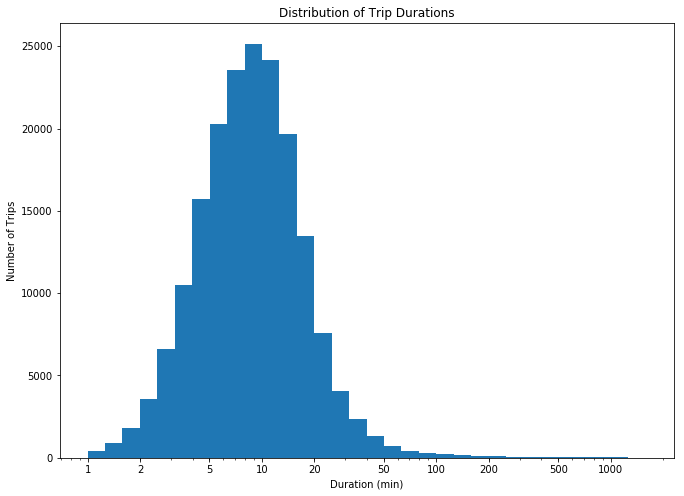

In [8]:
# logarthmic scale transformation on a histogram
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[11, 8])
plt.hist(data = df, x = 'duration_minutes', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

## Trip duration and gender  
The box plot shows that females have longer trips as compared to males, despite the fact that females are fewer as opposed to male users. 

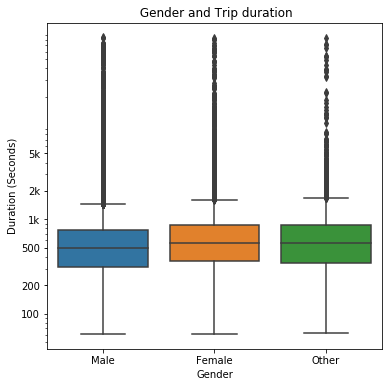

In [9]:
plt.figure(figsize=[6,6])
sb.boxplot(data=df,x='member_gender',y='duration_sec',order=['Male','Female','Other'])
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Gender')
plt.ylabel('Duration (Seconds)')
plt.title(' Gender and Trip duration');

## Relationship between age, gender and trip durations 

The correlation between type of user (Customers and subscribers) age and trip duration is negative. This implies that the type of user has a minimal impact on the duration of trip and age of the use. 

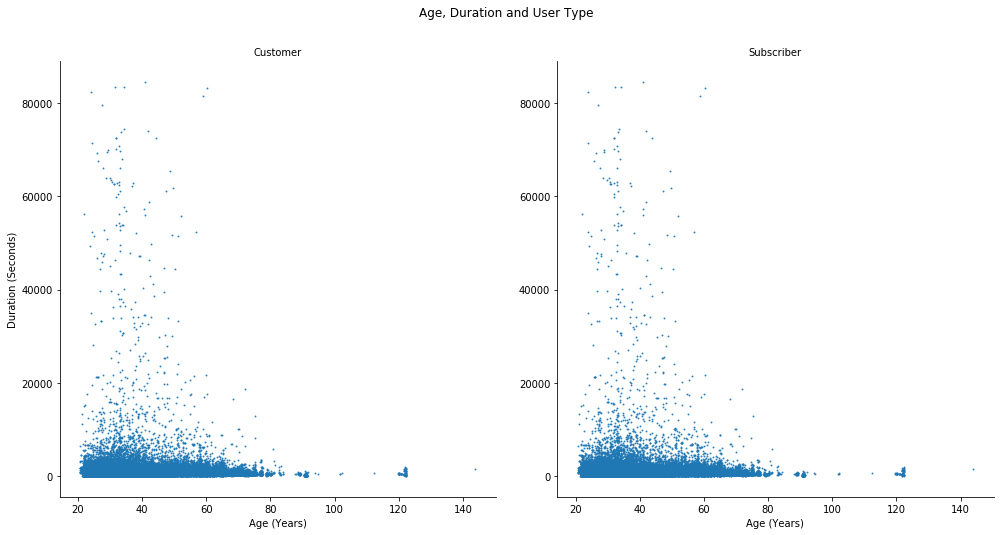

In [10]:
df['age'] = datetime.now().year - df.member_birth_year
g=sb.FacetGrid(data=df,col='user_type', aspect = 2)
g.map(sb.regplot,data=df, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'s':1})
g.set_titles('{col_name}')
g.set_axis_labels('Age (Years)','Duration (Seconds)')
plt.suptitle('Age, Duration and User Type');

##set plot dimensions
g.fig.set_size_inches(14,8);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 340886 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
